In [1]:
import torch
import torch.nn as nn

# Написать на PyTorch forward и backward полносвязного слоя без использования autograd

In [2]:
# Функция активации и ее производная
def sigmoid (x):
    return 1/(1 + torch.exp(-x))

def derivatives_sigmoid(x):
    return x * (1 - x)

In [3]:
class NN(nn.Module):
    def __init__(self, input_dim: int, output_dim: int):
        super().__init__()
        self.linear = nn.Linear(in_features=input_dim, out_features=output_dim)
        self.activation = sigmoid
        self.saved_tensors = None

    def forward(self, input_x):
        self.saved_tensors = input_x
        return self.activation(self.linear(input_x))

    def backward(self, grad_output):
        return grad_output * derivatives_sigmoid(self.saved_tensors)



# Написать 1-2 адаптивных **оптимизатора**

In [4]:
class AdaGrad:
    def __init__(self, lr, model):
        self.accumulated = torch.zeros_like(model)
        self.lr = lr
        self.adapt_lr = lr
        self.model = model

    def step(self, grad):
        self.accumulated += grad**2
        self.adapt_lr = self.lr / torch.sqrt(self.accumulated)
        self.model -= self.adapt_lr * grad

In [5]:
class SDGMomentum:
    def __init__(self, momentum, lr, model):
        self.momentum = momentum
        self.lr = lr
        self.velocity = torch.zeros_like(model)
        self.model = model

    def step(self, grad):
        self.velocity = self.momentum * self.velocity - self.lr * grad
        self.model += self.velocity

# Решить задачу нахождения корней квадратного уравнения методом градиентного спуска

In [6]:
def func(x):
    return (3*x + 17)**2 
def grad_f(x):
    return 2 * (3 * x + 17) * 2 

def solver(init_x, optimizer, max_iter=1000):
    g = grad_f(init_x)
    optim = optimizer
    for i in range(max_iter):
        optim.step(g)
        g = grad_f(optim.model)
    print(optim.model)
    return optim.model

In [7]:
x = torch.tensor(10.)
_ = solver(init_x=x, optimizer=AdaGrad(lr=0.3, model=x), max_iter=10000)

tensor(-5.6665)


In [8]:
x = torch.tensor(10.)
_ = solver(init_x=x, optimizer=SDGMomentum(lr=0.01, momentum=0.95, model=x))

tensor(-5.6667)


In [9]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: <object object at 0x7efd35c580f0>


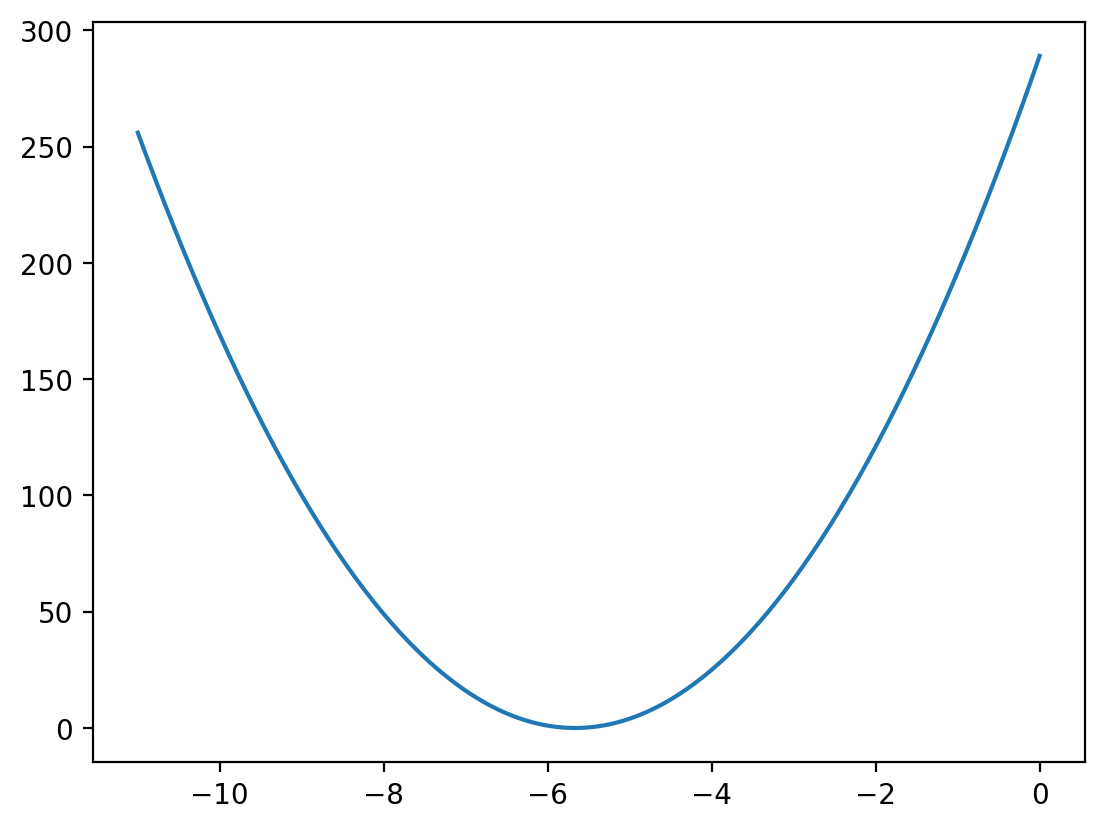

In [10]:
x = np.linspace(-11,0,200)
y = (3*x + 17)**2 

plt.plot(x, y)
plt.show()